# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [43]:
# Initial imports
import os
import pandas as pd
pd.options.display.max_columns = 100
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kashyapsuratia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [44]:
# Read your api key environment variable
load_dotenv()
API_KEY = os.getenv('API_KEY')
print(API_KEY)

2272602971bd4c8f944b20d55dddcf8c


In [45]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=API_KEY)

In [46]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

In [47]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

In [50]:
# Create the Bitcoin sentiment scores DataFrame
btc_data = btc_articles
btc_df = pd.json_normalize(btc_data, record_path =['articles'])
analyser = SentimentIntensityAnalyzer()
btc_df['processed'] = btc_df['description'].map(lambda x: analyser.polarity_scores(x))

In [51]:
# Create the Ethereum sentiment scores DataFrame
eth_data = eth_articles
eth_df = pd.json_normalize(eth_data, record_path =['articles'])
analyser = SentimentIntensityAnalyzer()
eth_df['processed'] = eth_df['content'].map(lambda x: analyser.polarity_scores(x))

In [52]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,processed
count,20,20,20,20,20,20,20,20,20,20
unique,12,17,18,18,17,17,18,3,3,16
top,Sarah Perez,Blockchain startup XREX gets $17M to make cros...,Blockchain startup XREX was launched to help c...,https://techcrunch.com/2021/08/22/blockchain-s...,https://cdn.vox-cdn.com/thumbor/Cc25lbecHTviBb...,2021-08-23T01:00:32Z,Blockchain startup co-founders Winston Hsiao a...,techcrunch,TechCrunch,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp..."
freq,5,3,2,2,2,3,2,13,13,3


In [53]:
#showing the result of the sentiment score for bitcoin coin
btc_df['processed'].values

array([{'neg': 0.071, 'neu': 0.806, 'pos': 0.123, 'compound': 0.4767},
       {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.5106},
       {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.6908},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.4588},
       {'neg': 0.159, 'neu': 0.78, 'pos': 0.061, 'compound': -0.4588},
       {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.2263},
       {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.6908},
       {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.4939},
       {'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4767},
       {'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compound': -0.128},
       {'neg': 0.041, 'neu': 0.959, 'pos': 0.0, 'compound': -0.1027},
       {'neg': 0.188, 'neu': 0.594, 'pos': 0.218, 'compound': -0.1027},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.105, 'neu': 0.649, 'pos'

In [54]:
# Describe the Ethereum Sentiment
eth_df.describe()

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,processed
count,15,15,15,15,15,15,15,15,15,15
unique,9,14,14,14,14,13,14,2,2,10
top,Sarah Perez,"This Week in Apps: Google, TikTok add protecti...","Welcome back to This Week in Apps, the weekly ...",https://techcrunch.com/2021/08/14/this-week-in...,https://s.yimg.com/uu/api/res/1.2/OBnX4Rv3sXK2...,2021-08-14T17:30:23Z,"Welcome back to This Week in Apps, the weekly ...",techcrunch,TechCrunch,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp..."
freq,5,2,2,2,2,2,2,9,9,3


In [55]:
#values of sentiment scores for the ethurium coin
eth_df['processed'].values

array([{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.4588},
       {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'compound': -0.128},
       {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.4215},
       {'neg': 0.056, 'neu': 0.944, 'pos': 0.0, 'compound': -0.25},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.066, 'neu': 0.934, 'pos': 0.0, 'compound': -0.296},
       {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.4588},
       {'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.7783},
       {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.5423},
       {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.5574},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.086, 'neu': 0.863, 'pos': 0.051, 'compound': -0.3182},
       {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'compound': -0.128},
       {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.4588},
       {'neg': 0.056, 'neu': 0.944, 'pos': 0

In [56]:
#normalizing the sentiment scroe json to dataframe
btc_sentiment_score = pd.json_normalize(btc_df['processed'])
btc_sentiment_score['pos'].mean()

0.10605

In [57]:
#normalizing the sentiment scroe json to dataframe
eth_sentiment_score = pd.json_normalize(eth_df['processed'])
eth_sentiment_score['pos'].mean()

0.035

In [58]:
#max of the compound score of bitcoin 
max(btc_sentiment_score['compound'])

0.8331

In [59]:
#max of the compound score of ethurium coin 
max(eth_sentiment_score['compound'])

0.5574

In [60]:
#max of the positive score of bitcoin 
max(btc_sentiment_score['pos'])

0.283

In [61]:
#max of the compound score of ethurium 
max(eth_sentiment_score['pos'])

0.133

### Questions:

Q: Which coin had the highest mean positive score?

A: The bitcoin has the highest mean positive score  that is 0.1069 while the ethorium coin has mean positive score of 0.04083333333

Q: Which coin had the highest compound score?

A: The bitcoin has the highest compound score of 0.8986 whereas the ethurium coin has the compound score of 0.5267

Q. Which coin had the highest positive score?

A: The bitcoin has the highest positive score of 0.283 whereas the ethurium coin has the positive score of 0.098

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [67]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kashyapsuratia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kashyapsuratia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [68]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
stop_words = stopwords.words('english')
import string

In [69]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    #removing punctuation
    puncRem = "".join([c for c in text if c not in string.punctuation])
    
    # Create a tokenized list of the words
    tokens = re.split('\W+',text)
    
    # Lemmatize words into root words
    root_words = []
    for x in tokens:
        root_words.append(lemmatizer.lemmatize(x))
   
    # Convert the words to lowercase
    root_words_lower = [x.lower() for x in root_words]
    
    
    # Remove the stop words
    clean_words = [word for word in root_words_lower if word not in stop_words]
    
    return clean_words

In [70]:
# Create a new tokens column for Bitcoin
#btc_df.head()
btc_df['tokens'] = btc_df['content'].apply(lambda x: tokenizer(x))

In [71]:
# Create a new tokens column for Ethereum
#btc_df.head()
eth_df['tokens'] = eth_df['content'].apply(lambda x: tokenizer(x))

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [72]:
from collections import Counter
from nltk import ngrams

In [73]:
# Generate the Bitcoin N-grams where N=2
n_grams = ngrams(btc_df['tokens'], 2)
btc_ngrams = []
for gram in n_grams:
    for i in gram:
        for y  in i:
            btc_ngrams.append(y)
btc_ngrams  = ' '.join(btc_ngrams).split()

In [74]:
# Generate the Ethereum N-grams where N=2
n_grams = ngrams(eth_df['tokens'], 2)
eth_ngrams = []
for gram in n_grams:
    for i in gram:
        for y  in i:
            eth_ngrams.append(y)
eth_ngrams  = ' '.join(eth_ngrams).split()

In [75]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [76]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_ngrams)

[('char', 38), ('mobile', 14), ('series', 12)]

In [77]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_ngrams)

[('char', 28), ('cryptocurrency', 16), ('mobile', 10)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

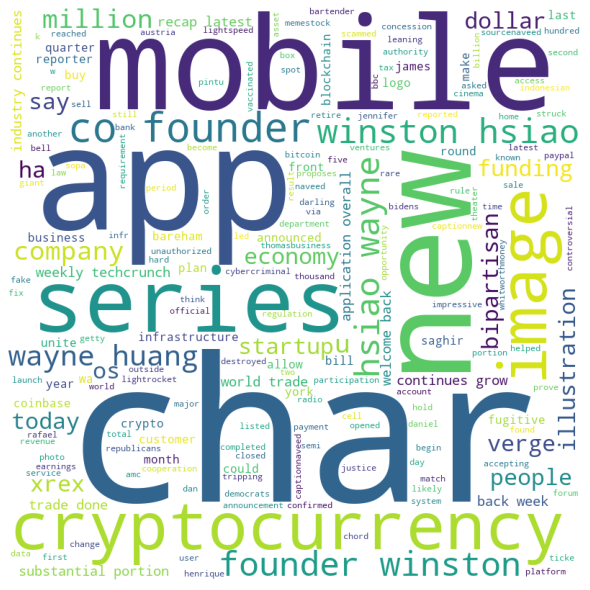

In [81]:
# Generate the Bitcoin word cloud
comment_words = ''  
stopword = set(stop_words)
tokens = btc_df['tokens']
for t in tokens:
    comment_words += " ".join(t)+" " 
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopword,min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

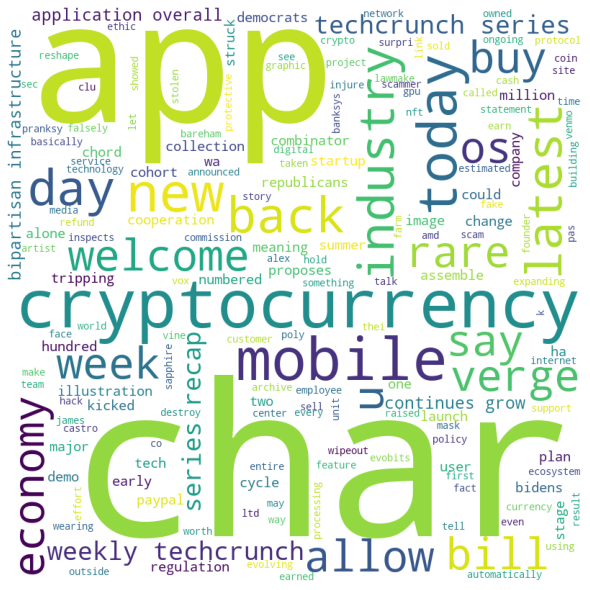

In [83]:
# Generate the Ethereum word cloud
comment_words = ''  
stopword = set(stop_words)
tokens = eth_df['tokens']
for t in tokens:
    comment_words += " ".join(t)+" " 
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopword,min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [98]:
import spacy
from spacy import displacy

In [99]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [100]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [101]:
# Concatenate all of the Bitcoin text together
concated_word_btc = ""
for t in btc_df['tokens']:
    concated_word_btc += " ".join(t)+" " 

In [102]:
# Run the NER processor on all of the text
doc = nlp(concated_word_btc)

# Add a title to the document
doc.user_data["title"] = "NER PROCESSING ON BITCOIN ARTICLES"

In [103]:
# Render the visualization
displacy.render(doc, style="dep")

In [105]:
# List all Entities
doc.ents

(3765,
 bell,
 today,
 quarter,
 2 23 billion,
 4900,
 winston hsiao wayne,
 xrex,
 winston hsiao wayne,
 huang,
 4306,
 last year,
 2450,
 weekly,
 26776,
 justice department,
 20 people hundred thousand dollar,
 2396,
 first,
 today,
 4423,
 winston hsiao wayne,
 xrex,
 winston hsiao wayne,
 huang,
 4306,
 two month,
 indonesian,
 35 million,
 4951,
 new york,
 captionnew york,
 6434,
 bidens major bipartisan,
 republicans,
 democrats,
 6331,
 james bareham,
 3559,
 dan whitworthmoney box,
 bbc radio,
 4,
 44 year 4274,
 five month,
 100 million,
 today,
 130 million,
 winston hsiao wayne,
 huang,
 united states,
 4213,
 james bareham,
 3914,
 london,
 17 million,
 7475,
 weekly,
 26776,
 weekly,
 22165,
 19953)

---

### Ethereum NER

In [106]:
# Concatenate all of the Ethereum text together
concated_word_eth = ""
for t in eth_df['tokens']:
    concated_word_eth += " ".join(t)+" "

In [107]:
# Run the NER processor on all of the text
doc1 = nlp(concated_word_eth)

# Add a title to the document
doc1.user_data["title"] = "NER PROCESSING ON ETHERIUM ARTICLES"

In [108]:
# Render the visualization
displacy.render(doc1, style="dep")

In [110]:
# List all Entities
doc1.ents

(weekly,
 26776,
 bidens major bipartisan,
 republicans,
 democrats,
 6331,
 first,
 today,
 4423,
 today,
 summer 2021,
 two,
 hundred,
 55280,
 today,
 12525,
 james bareham,
 3914,
 weekly,
 26776,
 5778,
 19953,
 today,
 3606,
 sec,
 30 million,
 evobits crypto farm clu,
 2777,
 alex castro verge,
 600 million,
 3738,
 bidens major bipartisan,
 republicans,
 democrats,
 6329,
 weekly,
 26213,
 today,
 summer 2021,
 two,
 hundred,
 55208)

---